Dataset shape: (768, 9)

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset description:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



BASELINE MODEL (All Features)
Accuracy: 0.7576

Confusion Matrix:
[[122  29]
 [ 27  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231


PCA FEATURE EXTRACTION
Explained variance ratio: [0.25327878 0.21893528 0.13109381 0.11808609 0.09684677]
Total explained variance: 0.8182


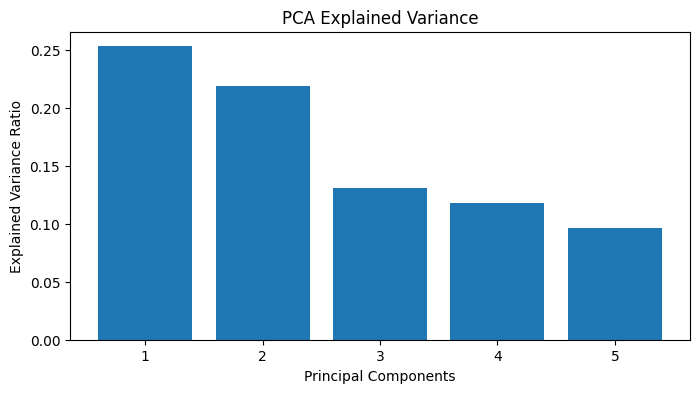

Accuracy: 0.6753

Confusion Matrix:
[[115  36]
 [ 39  41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       151
           1       0.53      0.51      0.52        80

    accuracy                           0.68       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.67      0.68      0.67       231


FEATURE AGGLOMERATION
Feature clusters:
Feature 0 (Pregnancies) → Cluster 3
Feature 1 (Glucose) → Cluster 0
Feature 2 (BloodPressure) → Cluster 0
Feature 3 (SkinThickness) → Cluster 1
Feature 4 (Insulin) → Cluster 1
Feature 5 (BMI) → Cluster 0
Feature 6 (DiabetesPedigreeFunction) → Cluster 2
Feature 7 (Age) → Cluster 3
Accuracy: 0.7403

Confusion Matrix:
[[124  27]
 [ 33  47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy         

In [ ]:
# Diabetes Dataset Feature Extraction and Classification


# Install required packages
!pip install pandas scikit-learn numpy matplotlib > /dev/null

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset

diabetes = pd.read_csv('/content/diabetes.csv')


# Display dataset info
print("Dataset shape:", diabetes.shape)
print("\nFirst 5 rows:")
display(diabetes.head())
print("\nDataset description:")
display(diabetes.describe())

# Separate features and target
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Function to evaluate classifier
def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model

# Baseline model (no feature extraction)
print("\n" + "="*50)
print("BASELINE MODEL (All Features)")
print("="*50)
baseline_clf = RandomForestClassifier(random_state=42)
evaluate_classifier(baseline_clf, X_train, X_test, y_train, y_test)

# PCA Feature Extraction
print("\n" + "="*50)
print("PCA FEATURE EXTRACTION")
print("="*50)

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

# Train and evaluate with PCA features
pca_clf = RandomForestClassifier(random_state=42)
evaluate_classifier(pca_clf, X_train_pca, X_test_pca, y_train, y_test)

# Feature Agglomeration
print("\n" + "="*50)
print("FEATURE AGGLOMERATION")
print("="*50)

# Apply Feature Agglomeration
agglo = FeatureAgglomeration(n_clusters=4)  # Reduce to 4 feature clusters
X_train_agglo = agglo.fit_transform(X_train)
X_test_agglo = agglo.transform(X_test)

print("Feature clusters:")
for i, cluster in enumerate(agglo.labels_):
    print(f"Feature {i} ({diabetes.columns[i]}) → Cluster {cluster}")

# Train and evaluate with agglomerated features
agglo_clf = RandomForestClassifier(random_state=42)
evaluate_classifier(agglo_clf, X_train_agglo, X_test_agglo, y_train, y_test)

# Compare results
print("\n" + "="*50)
print("SUMMARY OF RESULTS")
print("="*50)
print(f"Baseline Accuracy: {accuracy_score(y_test, baseline_clf.predict(X_test)):.4f}")
print(f"PCA Accuracy: {accuracy_score(y_test, pca_clf.predict(X_test_pca)):.4f}")
print(f"Feature Agglomeration Accuracy: {accuracy_score(y_test, agglo_clf.predict(X_test_agglo)):.4f}")